# 淘宝用户行为分析

## 一、数据处理

### 1.1 数据导入

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import datetime
import matplotlib.patches as patches
font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
myfont = font_manager.FontProperties(fname=font_path)


In [2]:
columns = ['user_id','item_id','category_id','behavior_type', 'timestamp']
df = pd.read_csv('UserBehavior.csv', names=columns)

In [3]:
print(df.head(100))

    user_id  item_id  category_id behavior_type   timestamp
0         1  2268318      2520377            pv  1511544070
1         1  2333346      2520771            pv  1511561733
2         1  2576651       149192            pv  1511572885
3         1  3830808      4181361            pv  1511593493
4         1  4365585      2520377            pv  1511596146
..      ...      ...          ...           ...         ...
95      100  1819306      1194311            pv  1511745401
96      100  4182583      1258177            pv  1511750991
97      100  2337874      1194311            pv  1511751022
98      100  3658601      2342116            pv  1511757958
99      100  5153036      2342116            pv  1511758581

[100 rows x 5 columns]


### 1.2 数据转换

In [4]:
# 时间戳转换为 datetime
df['event_time'] = pd.to_datetime(df['timestamp'], unit='s')+ datetime.timedelta(hours = 8)
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour
df['weekday'] = df['event_time'].dt.day_name()  # 后面可用于分析周几

In [5]:
df.head(10)

,user_id,item_id,category_id,behavior_type,timestamp,event_time,date,hour,weekday
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,1,Saturday
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,6,Saturday
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,9,Saturday
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15,Saturday
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15,Saturday
5,1,4606018,2735466,pv,1511616481,2017-11-25 21:28:01,2017-11-25,21,Saturday
6,1,230380,411153,pv,1511644942,2017-11-26 05:22:22,2017-11-26,5,Sunday
7,1,3827899,2920476,pv,1511713473,2017-11-27 00:24:33,2017-11-27,0,Monday
8,1,3745169,2891509,pv,1511725471,2017-11-27 03:44:31,2017-11-27,3,Monday
9,1,1531036,2920476,pv,1511733732,2017-11-27 06:02:12,2017-11-27,6,Monday


### 1.3 缺失值处理

In [6]:
# 判断是否有缺失值
df.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
event_time       0
date             0
hour             0
weekday          0
dtype: int64

### 1.4 异常值处理

In [7]:
# 去掉超出给定范围的数据
df['date'] = pd.to_datetime(df['date'])  
df = df[(df['date'] >= '2017-11-25') & (df['date'] < '2017-12-4')]

### 1.5 重复值处理

In [8]:
# 查看是否有重复值
df.duplicated().value_counts() 

False    100095182
True            49
dtype: int64

In [9]:
df = df.drop_duplicates(keep = 'first',inplace = False) # 去除重复值

### 1.6 重新索引

In [10]:
df = df.sort_values(by = ['timestamp','user_id'], ascending=True)
df = df.reset_index(drop=True)

In [11]:
df.head(30)

,user_id,item_id,category_id,behavior_type,timestamp,event_time,date,hour,weekday
0,184,3810981,903809,buy,1511539200,2017-11-25,2017-11-25,0,Saturday
1,1003,3016893,1587961,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
2,8509,514705,4145813,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
3,19051,3923620,982926,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
4,22835,2732055,846990,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
5,23459,2408862,2520771,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
6,32485,42030,4357323,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
7,34885,3060043,4217906,pv,1511539200,2017-11-25,2017-11-25,0,Saturday
8,39168,3310850,2520771,buy,1511539200,2017-11-25,2017-11-25,0,Saturday
9,39168,1939721,1320293,buy,1511539200,2017-11-25,2017-11-25,0,Saturday


In [157]:
print(df.describe())

            user_id       item_id   category_id     timestamp          hour
count  1.000952e+08  1.000952e+08  1.000952e+08  1.000952e+08  1.000952e+08
mean   5.069414e+05  2.579782e+06  2.696404e+06  1.511961e+09  1.490548e+01
std    2.940603e+05  1.488057e+06  1.463157e+06  2.300871e+05  6.111854e+00
min    1.000000e+00  1.000000e+00  8.000000e+01  1.511539e+09  0.000000e+00
25%    2.524270e+05  1.295225e+06  1.320293e+06  1.511762e+09  1.100000e+01
50%    5.040140e+05  2.580759e+06  2.671397e+06  1.511965e+09  1.600000e+01
75%    7.609440e+05  3.862042e+06  4.145813e+06  1.512179e+09  2.000000e+01
max    1.018011e+06  5.163070e+06  5.162429e+06  1.512317e+09  2.300000e+01


## 二、数据分析

### (二)用户行为习惯分析

### 2.1.1 页面访问量pv和独立访客数uv

In [38]:
daily_stats = df.groupby('date').agg(
    PV=('user_id', 'count'),
    UV=('user_id', 'nunique')
).reset_index()

In [39]:
daily_stats 

,date,PV,UV
0,2017-11-25,10420007,706641
1,2017-11-26,10664595,715516
2,2017-11-27,10101145,710094
3,2017-11-28,9878186,709257
4,2017-11-29,10284068,718922
5,2017-11-30,10447736,730597
6,2017-12-01,10859427,740139
7,2017-12-02,13777862,970401
8,2017-12-03,13662156,966977


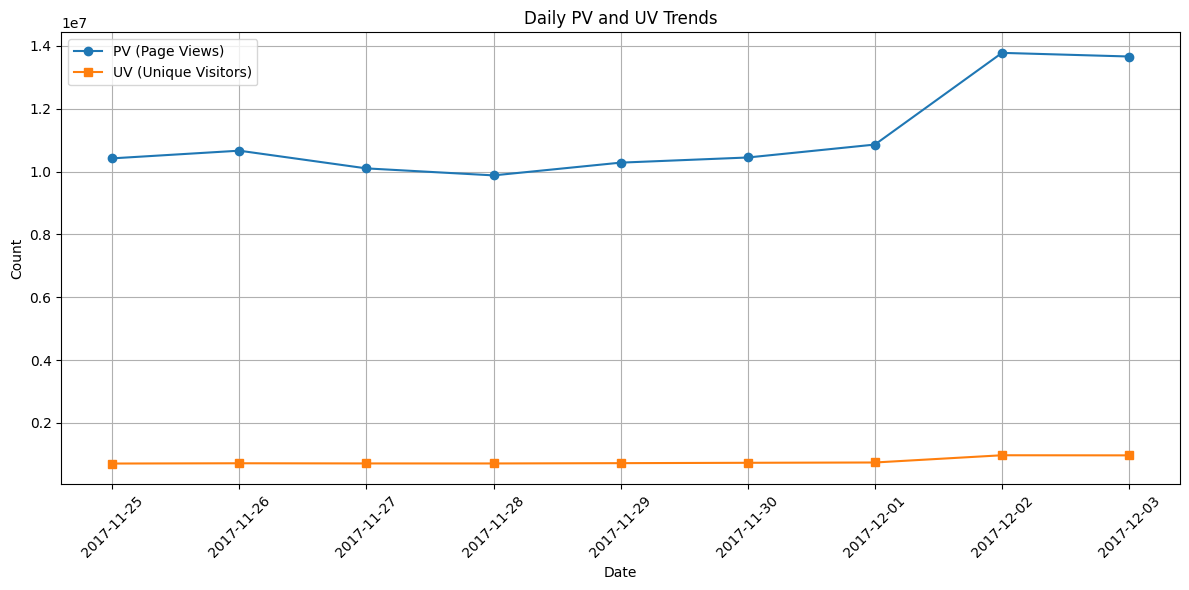

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['date'], daily_stats['PV'], label='PV (Page Views)', marker='o')
plt.plot(daily_stats['date'], daily_stats['UV'], label='UV (Unique Visitors)', marker='s')

plt.title('Daily PV and UV Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('res_figure/pv_uv_date.png')
plt.show()

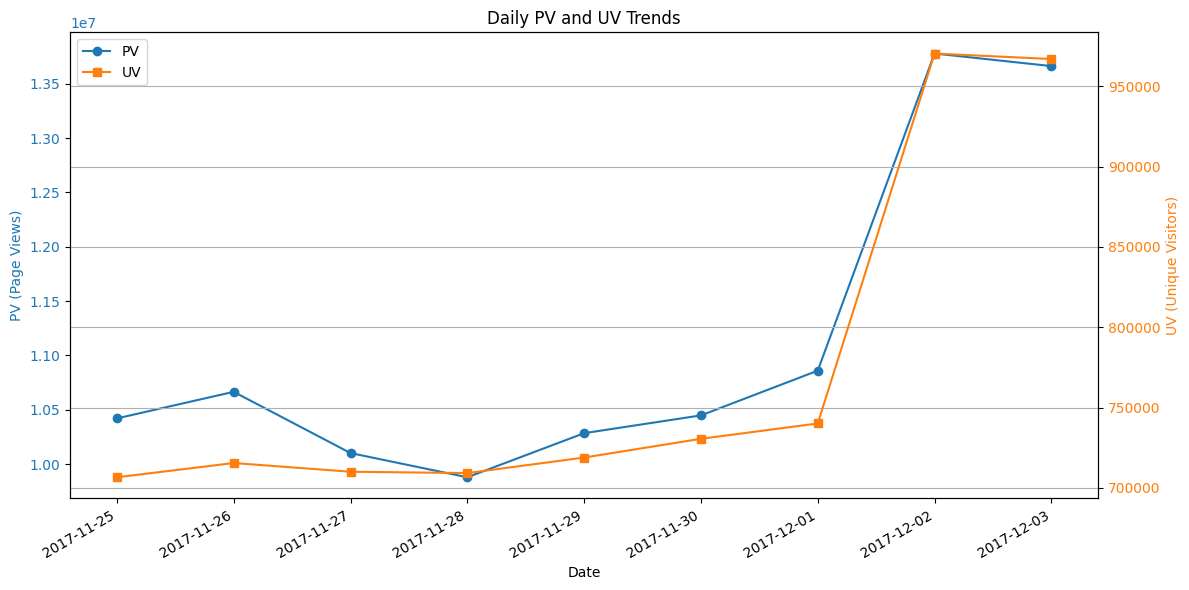

In [41]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：PV
color_pv = 'tab:blue'
ax1.plot(daily_stats['date'], daily_stats['PV'], label='PV', color=color_pv, marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('PV (Page Views)', color=color_pv)
ax1.tick_params(axis='y', labelcolor=color_pv)

# 右轴：UV（值不变）
ax2 = ax1.twinx()
color_uv = 'tab:orange'
ax2.plot(daily_stats['date'], daily_stats['UV'], label='UV', color=color_uv, marker='s')
ax2.set_ylabel('UV (Unique Visitors)', color=color_uv)
ax2.tick_params(axis='y', labelcolor=color_uv)

# 格式和图例
plt.title('Daily PV and UV Trends')
fig.autofmt_xdate()
fig.tight_layout()
plt.grid(True)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.savefig('res_figure/pv_uv_date.png')
plt.show()

In [42]:
pv_ratio1 = (13940942 - 10511597 )/10511597
pv_ratio2 = (11961006 - 10571039 )/10571039
uv_ratio1 = (941709 - 705571)/705571
uv_ratio2 = (917531 - 713522)/713522
print(pv_ratio1,pv_ratio2,uv_ratio1,uv_ratio2)

0.32624395703145775 0.13148821038310426 0.3346764535390485 0.28591830385047695


从图可以看出pv和uv整体变化趋势相同，11月25日到12月1日之间，uv变化不明显，pv在11月26日达到小高峰，与当天刚好是周六放假密切相关。从12月1日周四开始，pv和uv涨幅明显，12月2日和12月3日与上周相比较，pv环比增长率32.6%,13.1%，uv环比增长率33.5%,28.6%，可见本次活动宣传和引流效果不错,12月3日pv,uv相较于12月2日均有一定下滑，但pv下滑更多，说明吸引了很多用户，并且浏览页面可能比较明确，这应该和活动宣传和引流效果有关。

In [43]:
# 按小时分析用户行为习惯
hour_stats = df.groupby('hour').agg(
    PV=('user_id', 'count'),
    UV=('user_id', 'nunique')
).reset_index()

In [44]:
hour_stats

,hour,PV,UV
0,0,3402198,318390
1,1,1581628,167416
2,2,855227,98335
3,3,583953,71415
4,4,499706,64213
5,5,646085,84444
6,6,1366496,179928
7,7,2488350,329994
8,8,3403015,444398
9,9,4182498,520529


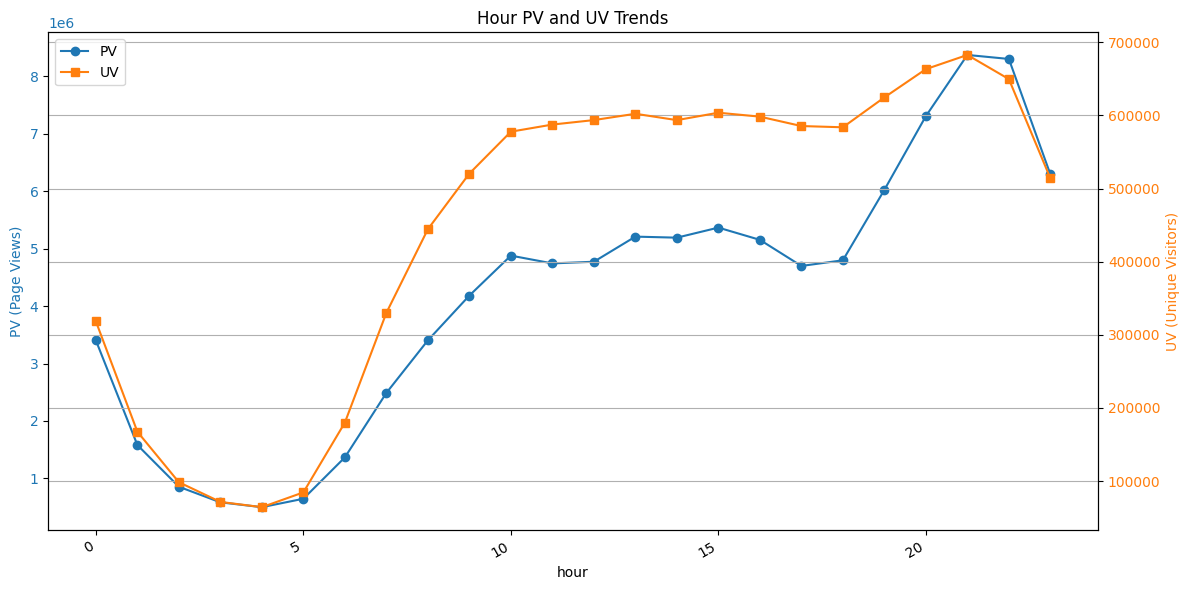

In [46]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：PV
color_pv = 'tab:blue'
ax1.plot(hour_stats['hour'],hour_stats['PV'], label='PV', color=color_pv, marker='o')
ax1.set_xlabel('hour')
ax1.set_ylabel('PV (Page Views)', color=color_pv)
ax1.tick_params(axis='y', labelcolor=color_pv)

# 右轴：UV（值不变）
ax2 = ax1.twinx()
color_uv = 'tab:orange'
ax2.plot(hour_stats['hour'], hour_stats['UV'], label='UV', color=color_uv, marker='s')
ax2.set_ylabel('UV (Unique Visitors)', color=color_uv)
ax2.tick_params(axis='y', labelcolor=color_uv)

# 格式和图例
plt.title('Hour PV and UV Trends')
fig.autofmt_xdate()
fig.tight_layout()
plt.grid(True)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.savefig('res_figure/pv_uv_hour.png')
plt.show()

从上图可以看出用户的活跃时间从上午10点持续到晚上10点，尤其是从下午6点开始呈现明显上升趋势，到晚上九点左右达到峰值，这符合大多数人的日常作息规律。由此可以建议店铺调整客服工作时间，增加下午6点到晚上10点的客服数量，促使用户从浏览向购买转换。

### 2.1.2 平均访问深度和跳失率

In [66]:
# 计算总用户数量
uv_count = df.user_id.nunique()
# 计算总的浏览数量
pv_count = df[df.behavior_type == 'pv'].shape[0]
# 计算平均访问深度
avg_pv_cnt_by_user = pv_count / uv_count

In [67]:
print(f'总用户数量： {uv_count}')
print(f'总的浏览数量： {pv_count}')
print(f'平均访问深度： {avg_pv_cnt_by_user}')

总用户数量： 987991
总的浏览数量： 89660671
平均访问深度： 90.75049367858614


In [68]:
# 计算每个用户浏览的页面数
pv_count_peruser = df[df['behavior_type'] == 'pv'].groupby('user_id')['behavior_type'].count().reset_index().rename(columns = {'behavior_type':'pv_count'})
# 计算只浏览一次界面的用户数量
bounce_user_count = pv_count_peruser[pv_count_peruser['pv_count'] == 1].shape[0]
# 计算流失率
bounce_rate = bounce_user_count/uv_count

In [69]:
pv_count_peruser

,user_id,pv_count
0,1,55
1,2,54
2,3,33
3,4,268
4,5,64
...,...,...
984100,1018007,161
984101,1018008,32
984102,1018009,286
984103,1018010,72


In [70]:
print(f'流失人数： {bounce_user_count}')
print(f'流失率： {bounce_rate}')

流失人数： 679
流失率： 0.0006872532239666151


可以得到用户的平均访问深度为90.8，也就是说在11月25到12月3日9天内平均每个用户每天要访问10个界面，可见淘宝用户粘度很高。

按照流失率=只浏览一次界面/总用户计算的话，发现流失人数只有679人，Bounce Rate 是 0.069% 左右，所以平台整体流失率是相当低的。

In [72]:
# 视为“流失”的用户分析：只浏览过（pv）无后续行为的用户
# 先找每个用户的所有行为类型
user_behaviors = df.groupby('user_id')['behavior_type'].unique()
# 只保留那些行为类型只包含 'pv' 的用户
only_pv_users = user_behaviors[user_behaviors.apply(lambda x: set(x) == {'pv'})].index.tolist()
only_pv_users_count =len(only_pv_users)
new_bounce_rate = only_pv_users_count/uv_count

In [74]:
print(f'只浏览的用户： {only_pv_users_count}')
print(f'新流失率： {new_bounce_rate}')

只浏览的用户： 59575
新流失率： 0.06029913227954506


发现流失人数有59575人，新流失率在6.03%左右，由此可见，平台整体流失率还是比较低的。

In [76]:
# 计算各商品类别的跳失率
# Step 1: 获取所有浏览行为
pv_df = df[df['behavior_type'] == 'pv']

# Step 2: 对每个用户在每个类别下的浏览次数
user_category_pv_counts = pv_df.groupby(['user_id', 'category_id']).size().reset_index(name='pv_count')

# Step 3: 找出只浏览一次某个类别的用户（行为只出现过一次）
single_pv_users = user_category_pv_counts[user_category_pv_counts['pv_count'] == 1]

# Step 4: 各类别的“只浏览一次用户数”
category_single_pv_users = single_pv_users.groupby('category_id')['user_id'].nunique()

# Step 5: 各类别总浏览用户数（去重）
category_total_users = pv_df.groupby('category_id')['user_id'].nunique()

# Step 6: 跳失率计算
category_bounce_rate = (
    (category_single_pv_users / category_total_users) * 100
).reset_index().rename(columns={'user_id': 'category_bounce_rate(%)'}).sort_values(by='category_bounce_rate(%)', ascending=False)


In [77]:
user_category_pv_counts

,user_id,category_id,pv_count
0,1,149192,6
1,1,411153,6
2,1,982926,1
3,1,1080785,1
4,1,1320293,2
...,...,...,...
22861297,1018011,2322253,1
22861298,1018011,2885642,22
22861299,1018011,3669044,1
22861300,1018011,4284875,1


In [78]:
single_pv_users

,user_id,category_id,pv_count
2,1,982926,1
3,1,1080785,1
7,1,2465336,1
10,1,2735466,1
11,1,2891509,1
...,...,...,...
22861293,1018011,378698,1
22861294,1018011,1299190,1
22861297,1018011,2322253,1
22861299,1018011,3669044,1


In [79]:
category_single_pv_users

category_id
80           7
1147         1
2171       425
2410       296
2424         1
          ... 
5158474    554
5159111     10
5159987      1
5160054     37
5161669    235
Name: user_id, Length: 9317, dtype: int64

In [80]:
category_total_users

category_id
80          13
1147         1
2171       711
2410       411
2424         3
          ... 
5159111     11
5159987      2
5160054     55
5161669    404
5162429      1
Name: user_id, Length: 9405, dtype: int64

In [81]:
category_bounce_rate

,category_id,category_bounce_rate(%)
7971,4349434,100.0
940,515576,100.0
7326,3994495,100.0
933,512689,100.0
8470,4636796,100.0
...,...,...
9142,5009745,NaN
9232,5058300,NaN
9234,5059323,NaN
9280,5090914,NaN


In [82]:
category_bounce_rate.head(100)

,category_id,category_bounce_rate(%)
7971,4349434,100.0
940,515576,100.0
7326,3994495,100.0
933,512689,100.0
8470,4636796,100.0
...,...,...
8556,4690238,100.0
1101,605728,100.0
1098,604890,100.0
2516,1402589,100.0


### 2.1.3 用户转化情况

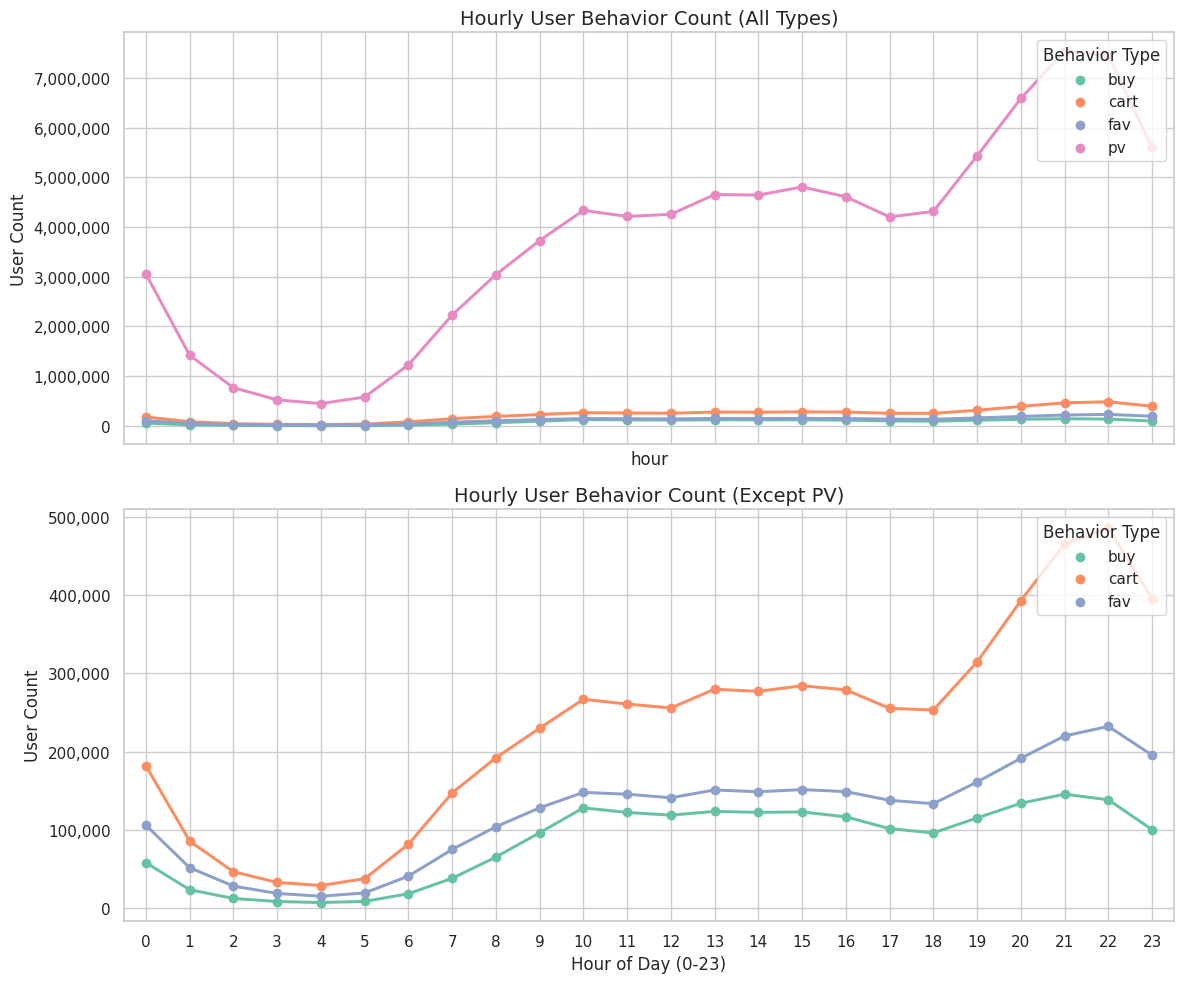

In [91]:
# 各种行为整体分布趋势 基于行为数量
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 统计各行为在各小时的用户数量
pv_detail = df.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_behavior'})

# 设置图像风格
sns.set(style="whitegrid")

# 创建两个子图
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 设置统一调色板
palette = sns.color_palette("Set2")

# 第一张图：所有行为
sns.pointplot(
    x='hour', y='total_behavior', hue='behavior_type', data=pv_detail,
    ax=axes[0], palette=palette, markers='o', linestyles='-', scale=0.8
)
axes[0].set_title('Hourly User Behavior Count (All Types)', fontsize=14)
axes[0].set_ylabel('User Count')
axes[0].legend(title='Behavior Type', loc='upper right')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[0].grid(True)

# 第二张图：除浏览行为外的行为（buy, cart, fav）
sns.pointplot(
    x='hour', y='total_behavior', hue='behavior_type', 
    data=pv_detail[pv_detail.behavior_type != 'pv'],
    ax=axes[1], palette=palette, markers='o', linestyles='-', scale=0.8
)
axes[1].set_title('Hourly User Behavior Count (Except PV)', fontsize=14)
axes[1].set_xlabel('Hour of Day (0-23)')
axes[1].set_ylabel('User Count')
axes[1].legend(title='Behavior Type', loc='upper right')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[1].grid(True)

# 设置x轴显示完整小时刻度
axes[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.savefig('res_figure/Hourly User Behavior Count.png')
plt.show()


四种用户行为的波动情况基本一致，其中浏览页面pv数远大于其他三项，用户加购物车、收藏和购买数依次降低，可以通过漏斗模型整体分析用户转化情况。

In [86]:
pv_detail

,behavior_type,hour,total_behavior
0,buy,0,57775
1,buy,1,23169
2,buy,2,12012
3,buy,3,8025
4,buy,4,6748
...,...,...,...
91,pv,19,5430878
92,pv,20,6586331
93,pv,21,7538382
94,pv,22,7443069


In [87]:
#计算各种行为总数
behavior_counts = df['behavior_type'].value_counts().reset_index()
behavior_counts.columns = ['behavior_type', 'count']

In [88]:
behavior_counts

,behavior_type,count
0,pv,89660671
1,cart,5530446
2,fav,2888258
3,buy,2015807


In [89]:
# 总行为数
total_pv = 89660671
total_cart = 5530446
total_fav = 2888258
total_buy = 2015807

# 转化率计算
cart_conversion_rate = total_cart / total_pv       # 加购率
fav_conversion_rate = total_fav / total_pv         # 收藏率
buy_conversion_rate = total_buy / total_pv         # 购买率


In [90]:

print(f"从浏览到加购的转化率: {cart_conversion_rate:.4%}")
print(f"从浏览到收藏的转化率: {fav_conversion_rate:.4%}")
print(f"从浏览到购买的转化率: {buy_conversion_rate:.4%}")

从浏览到加购的转化率: 6.1682%
从浏览到收藏的转化率: 3.2213%
从浏览到购买的转化率: 2.2483%


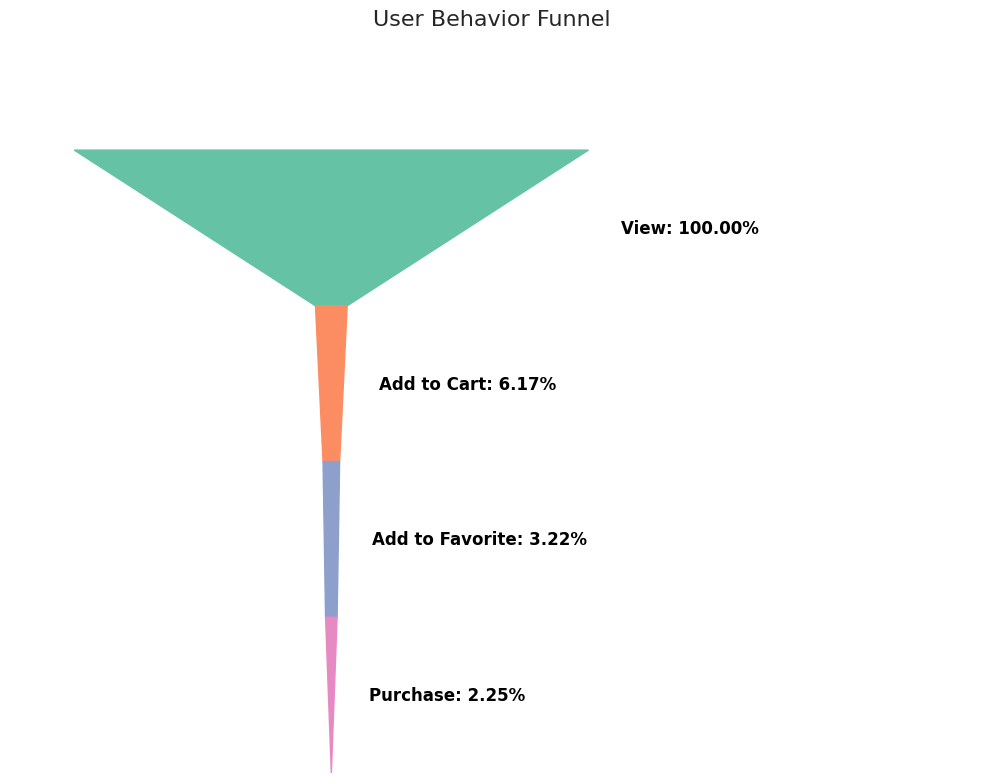

In [100]:
# 转化率（相对于浏览）
ratios = [1.0, cart_conversion_rate, fav_conversion_rate, buy_conversion_rate]
labels = ['View', 'Add to Cart', 'Add to Favorite', 'Purchase']
# 百分比格式文本
ratio_labels = [f"{r*100:.2f}%" for r in ratios]
# 漏斗图参数
widths = [r * 0.8 for r in ratios]  # 控制宽度以形成漏斗形状
heights = 0.8
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

fig, ax = plt.subplots(figsize=(10, 8))

# 画漏斗层（从上往下）
for i in range(len(ratios)):
    top_width = widths[i]
    y_top = -i * heights
    y_bottom = y_top - heights
    
    if i == len(ratios) - 1:  # 最后一层（Purchase）画成倒三角
        # 倒三角形：上边是梯形的下边宽度，下边收缩成一个点
        bottom_width = 0.05  # 几乎收缩成一个点
        x_top = (1 - top_width) / 2
        x_bottom = (1 - bottom_width) / 2
        
        # 倒三角形的三个顶点
        triangle = patches.Polygon([
            [x_top, y_top],
            [x_top + top_width, y_top],
            [0.5, y_bottom]  # 底部中心点
        ], closed=True, color=colors[i])
        ax.add_patch(triangle)
        
        # 文本标签放在右侧
        ax.text(x_top + top_width + 0.05, y_top - heights / 2, 
                f"{labels[i]}: {ratio_labels[i]}", 
                ha='left', va='center', fontsize=12, color='black', weight='bold')
    else:
        # 普通梯形层
        bottom_width = widths[i + 1] if i < len(ratios) - 1 else widths[i] * 0.7
        x_top = (1 - top_width) / 2
        x_bottom = (1 - bottom_width) / 2
        
        # 使用多边形模拟梯形
        funnel = patches.Polygon([
            [x_top, y_top],
            [x_top + top_width, y_top],
            [x_bottom + bottom_width, y_bottom],
            [x_bottom, y_bottom]
        ], closed=True, color=colors[i])
        ax.add_patch(funnel)
        
        # 文本标签放在右侧
        ax.text(x_top + top_width + 0.05, y_top - heights / 2, 
                f"{labels[i]}: {ratio_labels[i]}", 
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# 去除坐标轴
ax.axis('off')
ax.set_xlim(0, 1.5)  # 增加右边空间以容纳标签
ax.set_ylim(-len(ratios) * heights, 0.5)
plt.title("User Behavior Funnel", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('res_figure/User Behavior Funnel.png', dpi=300, bbox_inches='tight')
plt.show()

从浏览到加入购物车的转换率为6.17%，收藏商品的转换率为3.22%，最后购买的转换率为2.25%左右。从上面可以看出，加购率（6.17%）偏低，这说明可能存在商品详情页吸引力不足、用户对商品存在疑虑（如评价、售后）、加购流程繁琐等问题。从加购到购买的转化率36.5%（2.25%/6.17%），属于中等水平，但仍有优化空间：未完成支付（购物车页促销信息缺失、运费门槛；加购后缺乏召回手段（如未推送优惠券或库存提醒。
当前核心问题是 加购率不足和加购后的购买转化效率，需优先优化商品详情页和购物车流程。

### 2.1.4 用户行为路径分析

In [158]:

chunk_size = 20_000_000  # 每次处理 2000 万行
n = len(df)

all_user_item_behaviors = []

for start in range(0, n, chunk_size):
    end = min(start + chunk_size, n)
    print(f"正在处理 {start:,} ~ {end:,} 行")

    # 取分块
    chunk = df.iloc[start:end].copy()

    # 去重
    chunk_dedup = chunk.drop_duplicates(subset=['user_id', 'item_id', 'behavior_type'])

    # 按 user_id+item_id 聚合
    user_item_behaviors = (
        chunk_dedup.groupby(['user_id', 'item_id'])['behavior_type']
        .apply(list)
        .reset_index()
    )

    all_user_item_behaviors.append(user_item_behaviors)

# 合并
user_item_behaviors = pd.concat(all_user_item_behaviors, ignore_index=True)

# 再去重，合并跨块的 user-item 行为
user_item_behaviors = (
    user_item_behaviors.groupby(['user_id', 'item_id'])['behavior_type']
    .sum()  # 合并 list
    .apply(lambda x: list(set(x)))  # 去重
    .reset_index()
)

print(f"用户-商品组合数量: {len(user_item_behaviors)}")


正在处理 0 ~ 20,000,000 行
正在处理 20,000,000 ~ 40,000,000 行
正在处理 40,000,000 ~ 60,000,000 行
正在处理 60,000,000 ~ 80,000,000 行
正在处理 80,000,000 ~ 100,000,000 行
正在处理 100,000,000 ~ 100,095,182 行
用户-商品组合数量: 75928600


In [159]:
# 定义路径识别函数
def identify_path(behaviors):
    s = set(behaviors)
    if 'buy' not in s or 'pv' not in s:
        return None
    if 'cart' in s and 'fav' in s:
        return 'P4'
    elif 'cart' in s:
        return 'P2'
    elif 'fav' in s:
        return 'P3'
    else:
        return 'P1'

In [160]:
# 应用路径识别
user_item_behaviors['path_type'] = user_item_behaviors['behavior_type'].apply(identify_path)
# 统计每种路径数量
path_stats = user_item_behaviors['path_type'].value_counts().sort_index()
total_buy_paths = path_stats.sum()

In [161]:
# 转化为 DataFrame 并添加转化率
path_df = path_stats.reset_index()
path_df.columns = ['Path', 'UserCount']
path_df['Percent'] = (path_df['UserCount'] / total_buy_paths * 100).round(2).astype(str) + '%'


In [162]:
path_df

,Path,UserCount,Percent
0,P1,949273,72.67%
1,P2,255488,19.56%
2,P3,88009,6.74%
3,P4,13469,1.03%


In [165]:
# 计算转化率
def calc_base_count(path_type, df):
    if path_type == 'P1':
        return len(df[df['behavior_type'].apply(lambda x: 'pv' in x)])
    elif path_type == 'P2':
        return len(df[df['behavior_type'].apply(lambda x: 'pv' in x and 'cart' in x)])
    elif path_type == 'P3':
        return len(df[df['behavior_type'].apply(lambda x: 'pv' in x and 'fav' in x)])
    elif path_type == 'P4':
        return len(df[df['behavior_type'].apply(lambda x: 'pv' in x and 'cart' in x and 'fav' in x)])
    return 0

In [166]:
# 计算每个路径的转化率
conversion_rates = []
for _, row in path_df.iterrows():
    base_count = calc_base_count(row['Path'], user_item_behaviors)
    if base_count > 0:
        conversion_rate = row['UserCount'] / base_count * 100
        conversion_rates.append(f"{conversion_rate:.2f}%")
    else:
        conversion_rates.append("0.00%")

path_df['ConversionRate'] = conversion_rates

In [167]:
path_df

,Path,UserCount,Percent,ConversionRate
0,P1,949273,72.67%,1.34%
1,P2,255488,19.56%,9.69%
2,P3,88009,6.74%,7.41%
3,P4,13469,1.03%,16.00%


当前72.67%的用户通过直接购买路径（P1）转化率仅1.34%，而同时包含加购和收藏行为的复合路径（P4）虽只占1.03%流量，转化率却高达16%，存在显著优化空间。行为价值 ：'加购+收藏' > '加购' > '收藏' > '纯浏览'。

优化策略： 
流量再分配（建议进行ab测试）
措施：在商品页为P1路径用户增加「加入购物车」浮窗提示，对浏览超过30秒的用户自动推送收藏奖励（如「收藏立减5元」）等

路径优化
加购未购用户：加购后24小时推送「库存紧张」提醒；加购后48小时发放限时优惠券（折扣力度建议8-9折）。
收藏未购用户：在收藏夹添加「相似商品降价通知」功能；每周三定时推送「收藏商品专属折扣日」

高价值路径(P4)放大
识别P4路径商品特征，将这些商品添加到「猜你喜欢」推荐池；设计组合优惠（如「加购+收藏立享8折」

/tmp/ipykernel_13526/49804308.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, rotation=15, ha='right')


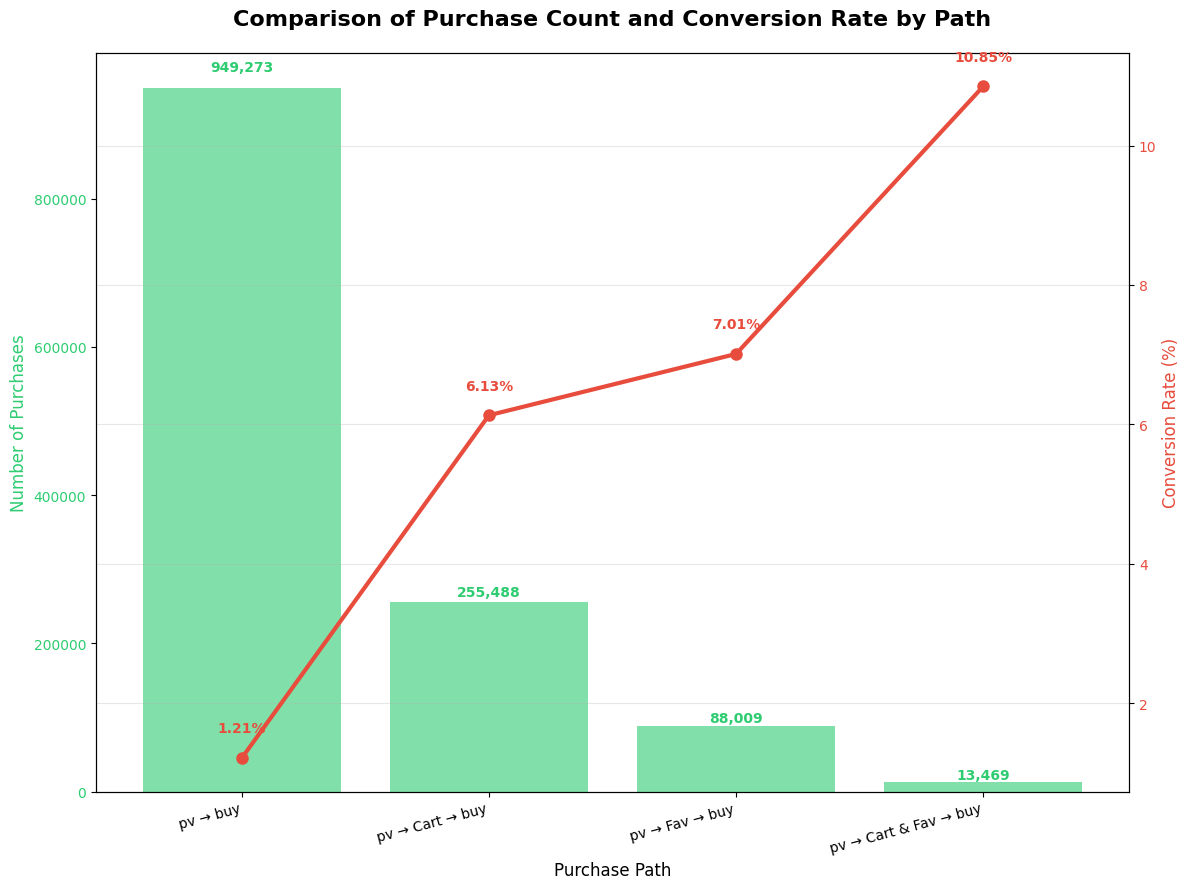

In [169]:
# 综合对比图（数量 vs 转化率）
fig, ax1 = plt.subplots(figsize=(12, 9))

# 左轴：数量
color1 = '#2ecc71'
ax1.set_xlabel('Purchase Path', fontsize=12)
ax1.set_ylabel('Number of Purchases', color=color1, fontsize=12)
bars1 = ax1.bar(x_labels, path_df['UserCount'], 
                color=color1, alpha=0.6, label='Number of Purchases')
ax1.tick_params(axis='y', labelcolor=color1)

ax1.set_xticklabels(x_labels, rotation=15, ha='right')

# 右轴：转化率
ax2 = ax1.twinx()
color2 = '#e74c3c'
ax2.set_ylabel('Conversion Rate (%)', color=color2, fontsize=12)
line = ax2.plot(x_labels, conversion_nums, color=color2, marker='o', 
                linewidth=3, markersize=8, label='Conversion Rate')
ax2.tick_params(axis='y', labelcolor=color2)

# 添加数值标签
for i, (bar, rate) in enumerate(zip(bars1, conversion_nums)):
    # 数量标签
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
            f'{int(height):,}', ha='center', va='bottom', 
            fontsize=10, color=color1, fontweight='bold')
    # 转化率标签
    ax2.text(i, rate + max(conversion_nums)*0.03, 
            f'{rate:.2f}%', ha='center', va='bottom',
            fontsize=10, color=color2, fontweight='bold')

plt.title('Comparison of Purchase Count and Conversion Rate by Path', fontsize=16, fontweight='bold', pad=20)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('res_figure/综合对比图（数量 vs 转化率）.png')
plt.show()

### 2.1.5 用户留存分析

In [39]:
def calculate_retention_matrix(data, max_days=7):
    """
    留存率矩阵
    参数:
        data: 包含date和user_id的DataFrame
        max_days: 最大计算留存天数
    返回:
        留存率矩阵DataFrame (日期×留存天数)
    """
    # 数据预处理
    data['date'] = pd.to_datetime(data['date'])
    unique_dates = pd.to_datetime(data['date'].sort_values().unique())
    
    # 初始化结果矩阵
    retention_matrix = pd.DataFrame(
        index=unique_dates,
        columns=range(1, max_days+1),
        dtype=float
    )
    
    # 特殊处理首日（11-25）所有用户视为新用户
    first_date = pd.to_datetime('2017-11-25')
    day0_users = set(data[data['date'] == first_date]['user_id'].unique())
    retention_matrix.at[first_date, 1] = len(day0_users)  # 首日基准
    
    # 计算每日留存
    for i, current_date in enumerate(unique_dates[:-1]):
        # 计算当日新增用户（除首日外）
        if current_date != first_date:
            prev_users = set(data[data['date'] < current_date]['user_id'].unique())
            day0_users = set(data[data['date'] == current_date]['user_id'].unique()) - prev_users
        
        # 计算n日留存
        for n in range(1, max_days+1):
            target_date = current_date + pd.Timedelta(days=n)
            if target_date > unique_dates[-1]:
                break
                
            retained_users = set(data[data['date'] == target_date]['user_id'].unique()) & day0_users
            retention_rate = len(retained_users) / len(day0_users) if day0_users else np.nan
            retention_matrix.at[current_date, n] = round(retention_rate, 6)
    
    # 格式调整（与示例图片完全一致）
    retention_matrix.index = retention_matrix.index.strftime('%Y-%m-%d')
    retention_matrix.columns = range(1, max_days+1)
    return retention_matrix.fillna(np.nan)  # 确保NaN显示一致

# 使用示例
retention_matrix = calculate_retention_matrix(df)
retention_matrix = retention_matrix.iloc[:-1] 
print(retention_matrix)

                   1         2         3         4         5         6  \
2017-11-25  0.788700  0.768195  0.759173  0.760797  0.766191  0.772793   
2017-11-26  0.653849  0.645959  0.658647  0.669014  0.685754  0.977830   
2017-11-27  0.615433  0.623972  0.643666  0.663314  0.971735  0.966549   
2017-11-28  0.618110  0.636750  0.664039  0.968402  0.962274       NaN   
2017-11-29  0.697786  0.719703  0.965646  0.960181       NaN       NaN   
2017-11-30  0.946128  0.957963  0.953066       NaN       NaN       NaN   
2017-12-01  0.901961  0.929412       NaN       NaN       NaN       NaN   
2017-12-02  0.722222       NaN       NaN       NaN       NaN       NaN   

                   7  
2017-11-25  0.985516  
2017-11-26  0.973544  
2017-11-27       NaN  
2017-11-28       NaN  
2017-11-29       NaN  
2017-11-30       NaN  
2017-12-01       NaN  
2017-12-02       NaN  


In [40]:
retention_matrix

,1,2,3,4,5,6,7
2017-11-25,0.788700,0.768195,0.759173,0.760797,0.766191,0.772793,0.985516
2017-11-26,0.653849,0.645959,0.658647,0.669014,0.685754,0.977830,0.973544
2017-11-27,0.615433,0.623972,0.643666,0.663314,0.971735,0.966549,NaN
2017-11-28,0.618110,0.636750,0.664039,0.968402,0.962274,NaN,NaN
2017-11-29,0.697786,0.719703,0.965646,0.960181,NaN,NaN,NaN
2017-11-30,0.946128,0.957963,0.953066,NaN,NaN,NaN,NaN
2017-12-01,0.901961,0.929412,NaN,NaN,NaN,NaN,NaN
2017-12-02,0.722222,NaN,NaN,NaN,NaN,NaN,NaN


由图可以看出，前4天留存呈平缓下降趋势（11-25日：78.87%→76.08%）符合典型用户流失曲线。所有日期在 第5-7天留存突然跃升至95%+（如11-25日的7日留存98.55%）可能原因：周期性活动（如周末促销）、数据采集异常（如自动登录脚本）。新用户质量稳定（前4日留存60-80%）。用户在第3-4天出现小幅度回升（可能因多日登录奖励触发）。

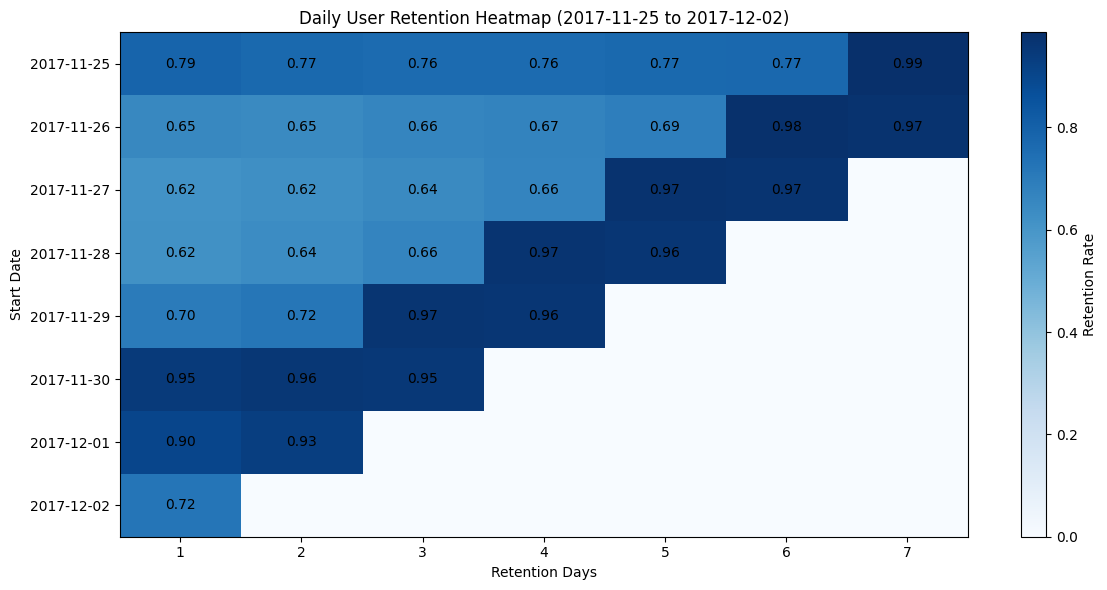

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(retention_matrix.fillna(0), cmap='Blues', aspect='auto')
plt.colorbar(label='Retention Rate')
plt.xticks(range(7), labels=range(1,8))
plt.yticks(range(len(retention_matrix)), labels=retention_matrix.index)
plt.title('Daily User Retention Heatmap (2017-11-25 to 2017-12-02)')
plt.xlabel('Retention Days')
plt.ylabel('Start Date')
for i in range(len(retention_matrix)):
    for j in range(7):
        val = retention_matrix.iat[i, j]
        plt.text(j, i, f'{val:.2f}' if not pd.isna(val) else '', 
                ha='center', va='center', color='black')
plt.tight_layout()
plt.savefig('res_figure/每日用户留存率热力图.png')
plt.show()

### （二）用户消费习惯分析

### 2.2.1 用户付费率

In [57]:
# 用户付费率 = 有购买记录的用户 / 活跃用户计算：
paying_user_count = df[df.behavior_type == 'buy'].user_id.nunique()
uv_count = df['user_id'].nunique()
paying_user_rate = round(100 * paying_user_count / uv_count,2)


In [58]:
print(f"{paying_user_rate}%")

68.06%


得到用户付费率为68.06%，由此说明淘宝用户付费率还是比较高的


### 2.2.2 用户购买次数

In [63]:
# 计算付费用户平均消费次数 总购买次数 / 总付费用户
total_buy_num = df[df.behavior_type == 'buy'].shape[0]
avg_buy_num =  total_buy_num / paying_user_count

In [64]:
avg_buy_num

2.997910482388564

In [65]:
# 付费用户购买次数分布
# 获取每个付费用户的购买次数
user_buy_counts = df[df['behavior_type'] == 'buy']['user_id'].value_counts()

# 统计各购买次数对应的用户数
buy_distribution = user_buy_counts.value_counts().sort_index()

In [66]:
buy_distribution

1      228546
2      157240
3      100933
4       63453
5       40409
        ...  
118         1
131         1
159         1
175         1
262         1
Name: user_id, Length: 90, dtype: int64

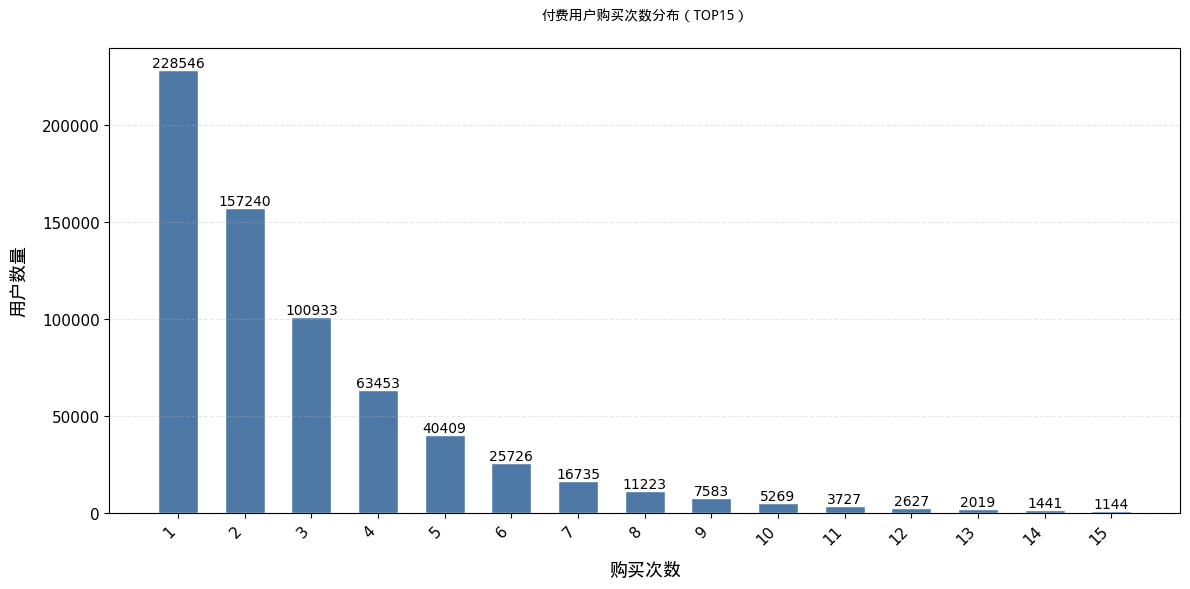

In [72]:
plt.figure(figsize=(12, 6))
top15_dist = buy_distribution.head(15)
bars = plt.bar(top15_dist.index.astype(str), top15_dist.values, 
               color='#4e79a7', edgecolor='white', width=0.6)


plt.title('付费用户购买次数分布（TOP15）', fontsize=16, pad=20, fontproperties=myfont)
plt.xlabel('购买次数', fontsize=13, labelpad=10, fontproperties=myfont)
plt.ylabel('用户数量', fontsize=13, labelpad=10, fontproperties=myfont)


plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.savefig('res_figure/付费用户购买次数分布.png', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
percentage_dist = (buy_distribution / buy_distribution.sum() * 100).round(2)

In [76]:
percentage_dist.head(20)

1     33.99
2     23.38
3     15.01
4      9.44
5      6.01
6      3.83
7      2.49
8      1.67
9      1.13
10     0.78
11     0.55
12     0.39
13     0.30
14     0.21
15     0.17
16     0.12
17     0.10
18     0.07
19     0.06
20     0.05
Name: user_id, dtype: float64

In [92]:
for i in range(1,20):
    percentage_dist_sum = percentage_dist[percentage_dist.index <= i].sum()
    print(f"购买次数<={i}次的用户总占比：{percentage_dist_sum }%")

购买次数<=1次的用户总占比：33.99%
购买次数<=2次的用户总占比：57.370000000000005%
购买次数<=3次的用户总占比：72.38000000000001%
购买次数<=4次的用户总占比：81.82000000000001%
购买次数<=5次的用户总占比：87.83000000000001%
购买次数<=6次的用户总占比：91.66000000000001%
购买次数<=7次的用户总占比：94.15%
购买次数<=8次的用户总占比：95.82000000000001%
购买次数<=9次的用户总占比：96.95%
购买次数<=10次的用户总占比：97.73%
购买次数<=11次的用户总占比：98.28%
购买次数<=12次的用户总占比：98.67%
购买次数<=13次的用户总占比：98.97%
购买次数<=14次的用户总占比：99.17999999999999%
购买次数<=15次的用户总占比：99.35%
购买次数<=16次的用户总占比：99.47%
购买次数<=17次的用户总占比：99.57%
购买次数<=18次的用户总占比：99.63999999999999%
购买次数<=19次的用户总占比：99.69999999999999%


由此可知，购买次数为1次的用户数量最多，大约有88%的用户购买次数在5次以内，购买次数在10次以内的用户占总付费用户的98%。

### 2.2.3 用户复购率

In [97]:
# 用户复购率 = 多次购买用户数 / 总付费用户计算
#每个付费用户的购买次数
purchase_counts = (df[df['behavior_type'] == 'buy']
                   .groupby('user_id')
                   .size()  # 直接统计行数
                   .rename('paying_count'))
# 复购用户数量 通过筛选支付次数>=2 
repurchase_users = purchase_counts[purchase_counts >= 2].index.nunique()
# 复购率
buyer_retention_rate = round(100 * repurchase_users / paying_user_count, 2)

In [99]:
print(f"{buyer_retention_rate}%")

66.01%


In [102]:
# 用户复购的间隔时间
# 只保留购买行为
buy_data = df[df['behavior_type'] == 'buy'].copy()

# 按用户+时间排序
buy_data = buy_data.sort_values(['user_id', 'date'])

# 计算相邻购买的时间差（按用户分组）
buy_data['diff_days'] = buy_data.groupby('user_id')['date'].diff().dt.days

# 去掉首次购买的 NaN
buyer_retention_diff = buy_data['diff_days'].dropna()


In [103]:
# 描述统计
print(buyer_retention_diff.describe())

count    1.343403e+06
mean     1.179936e+00
std      1.672141e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      8.000000e+00
Name: diff_days, dtype: float64


有 134 万条 “相邻两次购买” 的时间差记录。用户在完成一次购买后，平均 1.18 天会再次购买。标准差 std ≈ 1.67 天，波动比较大，说明有不少用户是当天/隔天复购，也有人隔好几天才买。一半以上的复购是当天就完成的，这可能是同一订单拆单、一次购物多件商品分开下单等场景。75% 的复购会在 2 天内完成。

In [104]:
buyer_retention_diff

35725026    0.0
65479172    3.0
81724621    1.0
81724622    0.0
81732019    0.0
           ... 
59856817    3.0
65358470    1.0
71289276    0.0
78442987    1.0
80304456    0.0
Name: diff_days, Length: 1343403, dtype: float64

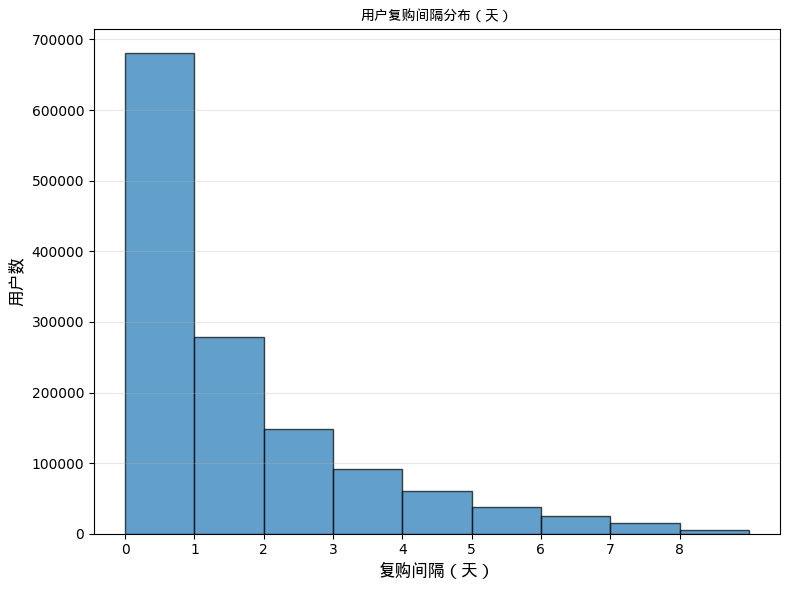

In [105]:
plt.figure(figsize=(8, 6))
plt.hist(buyer_retention_diff, bins=range(0, int(buyer_retention_diff.max()) + 2), 
         edgecolor='black', alpha=0.7)
plt.title('用户复购间隔分布（天）', fontsize=16, fontweight='bold',fontproperties=myfont)
plt.xlabel('复购间隔（天）', fontsize=12,fontproperties=myfont)
plt.ylabel('用户数', fontsize=12,fontproperties=myfont)
plt.xticks(range(0, int(buyer_retention_diff.max()) + 1))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('res_figure/用户复购间隔分布（天）.png')
plt.show()

# 2.2.4 商品大类销售分析

In [107]:
# 分析商品浏览TopN和商品销售TopN的数据
# 定义计算销售/浏览TopN的函数
def cal_topN (index, behavior_type, n):
    # 创建透视表
    topN = pd.pivot_table(df, index = index, values = 'user_id', columns = 'behavior_type', fill_value=0, 
                     aggfunc='count', margins = True).sort_values(by = behavior_type, ascending = False).fillna(0).head(n)
    topN['paying_rate'] = topN.apply(lambda x: x.buy / x.pv, axis = 1).apply(lambda x: format(x, '.2%'))
    topN = topN[['pv','buy','paying_rate']]
    return topN


In [108]:
# 计算商品大类浏览量前10
category_pv_topN = cal_topN('category_id', 'pv', 10)
# 计算商品大类购买量前10
category_buy_topN = cal_topN('category_id', 'buy', 10)



In [109]:
category_pv_topN 

behavior_type,pv,buy,paying_rate
category_id,,,
All,89660671,2015807,2.25%
4756105,4477682,28258,0.63%
2355072,3151734,12423,0.39%
4145813,3150716,31658,1.00%
3607361,2976357,12721,0.43%
982926,2798730,24823,0.89%
2520377,2029469,9812,0.48%
4801426,1864651,26495,1.42%
1320293,1793240,17137,0.96%


In [110]:
category_buy_topN

behavior_type,pv,buy,paying_rate
category_id,,,
All,89660671,2015807,2.25%
1464116,683641,34589,5.06%
2735466,1115651,33730,3.02%
2885642,954553,31844,3.34%
4145813,3150716,31658,1.00%
4756105,4477682,28258,0.63%
4801426,1864651,26495,1.42%
982926,2798730,24823,0.89%
2640118,729806,18332,2.51%


In [111]:
# 查看购买量和浏览量前10的交集
category_pv_buy_topN = pd.merge(category_pv_topN, category_buy_topN, 
                                        on = 'category_id', how ='inner')


In [112]:
category_pv_buy_topN

behavior_type,pv_x,buy_x,paying_rate_x,pv_y,buy_y,paying_rate_y
category_id,,,,,,
All,89660671,2015807,2.25%,89660671,2015807,2.25%
4756105,4477682,28258,0.63%,4477682,28258,0.63%
4145813,3150716,31658,1.00%,3150716,31658,1.00%
982926,2798730,24823,0.89%,2798730,24823,0.89%
4801426,1864651,26495,1.42%,1864651,26495,1.42%


由上图可知存在部分商品浏览量高但购买量较低，应进一步分析原因。

### 2.2.5 商品大类分析

In [117]:
#即针对所有产生购买行为的商品种类，分析其从浏览到最后购买发生的行为数量和最终购买量的关系。

# 筛选出产生购买行为的数据
data_buy = df[df['behavior_type'] == 'buy']

# 计算各种商品大类的交易数
buy_category = data_buy[['category_id','behavior_type']].groupby('category_id').count().rename(columns = {'behavior_type':'buy_count'})

# 整理各种商品大类的交易数
buy_category = buy_category.sort_values('buy_count',ascending=False).reset_index()

# 将产生购买行为的数据和原数据外连接，进而得到有购买记录的商品大类的其他行为信息
behav_category = pd.merge(data_buy[['user_id','category_id']], df, 
                                 on = ['user_id','category_id'], how = 'left')
# 计算各种商品大类的行为数
behav_category = behav_category[['category_id', 'behavior_type']].groupby('category_id').count().reset_index().rename(columns={'behavior_type':'behavior_count'})

# 统计分析各种商品大类的购买数和产生行为数
buy_behav_category = pd.merge(buy_category, behav_category, on = 'category_id', how = 'inner')
buy_behav_category = buy_behav_category.assign(behav_per_buy = buy_behav_category['behavior_count'] / buy_behav_category['buy_count'])

In [118]:
buy_behav_category

,category_id,buy_count,behavior_count,behav_per_buy
0,1464116,34589,311733,9.012490
1,2735466,33730,385919,11.441417
2,2885642,31844,434179,13.634562
3,4145813,31658,728315,23.005717
4,4756105,28258,969647,34.314070
...,...,...,...,...
7092,2331548,1,3,3.000000
7093,2332625,1,3,3.000000
7094,2333603,1,2,2.000000
7095,335089,1,1,1.000000


In [124]:
print(buy_behav_category.describe())

        category_id     buy_count  behavior_count  behav_per_buy
count  7.097000e+03   7097.000000     7097.000000    7097.000000
mean   2.575427e+06    284.036494     3065.703537       6.351193
std    1.478901e+06   1385.149570    23333.455653       5.355718
min    2.171000e+03      1.000000        1.000000       1.000000
25%    1.308457e+06      4.000000       19.000000       3.411765
50%    2.583941e+06     23.000000      132.000000       5.166667
75%    3.838044e+06    123.000000      814.000000       7.838710
max    5.161669e+06  34589.000000   969647.000000     150.000000


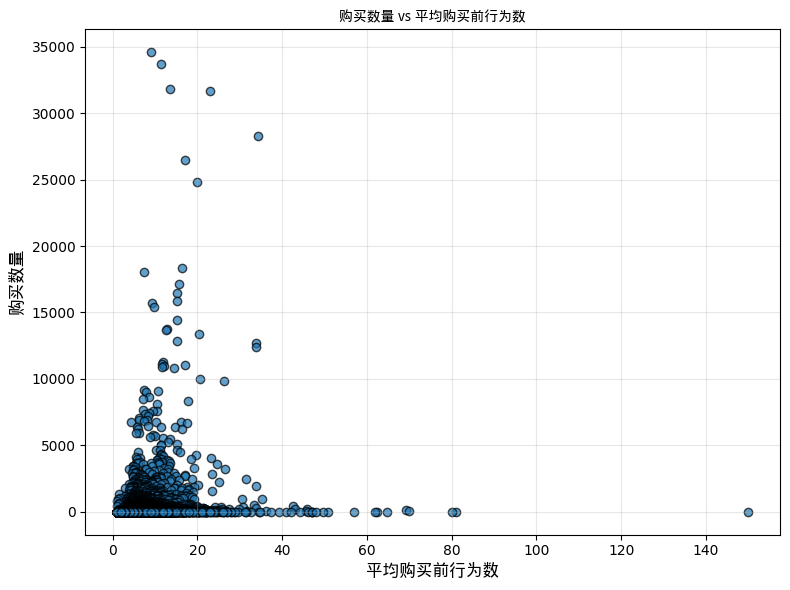

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(buy_behav_category['behav_per_buy'], buy_behav_category['buy_count'],
            alpha=0.7, edgecolors='k')

plt.title('购买数量 vs 平均购买前行为数', fontsize=16, fontweight='bold', fontproperties=myfont)
plt.xlabel('平均购买前行为数', fontsize=12, fontproperties=myfont)
plt.ylabel('购买数量', fontsize=12, fontproperties=myfont)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('res_figure/购买数量 vs 平均购买前行为数.png')
plt.show()


由上图可知，大部分购买行为平均只会产生20次以内的行为，可以据此对商品初步分类，以实施不同的运营策略。购买量大、行为数多（上图右上部分）：推测该区域商品是快销产品或高频刚需物品，不仅销量大而且可选择品牌众多，如食品、日用品、护肤品和衣物服装等。平台可以据此将该商品类别建立专区，可以同时浏览查看该类别下的诸多产品，减少用户的多次搜索，提升用户体验度购买量大、行为数少（上图左上部分）：推测该区域商品主要为高频产品，行为数少说明可能品牌种类少、被少数品牌垄断，或者是用户对某品牌建立了一定的依赖度等等。此类区域的商品，用户决策相对会轻松，因此应着重快速让用户触达商品，可以优先展示用户购买过的品牌等。购买量小、行为数少（上图左下部分）：大多数商品大类都集中分布在这个区域，应该针对具体类别具体分析。购买量小、行为数多（上图右下部分）：推测该区域商品低频或者商品贵重，用户需要货比三家、再三考虑后下单，对此可以改善商品的介绍方式，如现在的品牌直播，让用户更快速、直观的了解商品。


### (三)用户价值分析

In [140]:
#构建用户行为指标
snapshot_date = df['date'].max() + pd.Timedelta(days=1)

# 基础 RFM + 各类行为次数
user_features = df.groupby('user_id').agg(
    Recency=('date', lambda x: (snapshot_date - x.max()).days),
    Behavior_Frequency=('user_id', 'count')
)



In [141]:
user_features

,Recency,Behavior_Frequency
user_id,,
1,1,55
2,1,71
3,1,53
4,1,285
5,2,64
...,...,...
1018007,1,162
1018008,1,49
1018009,1,311


In [142]:
behavior_counts = df.groupby(['user_id', 'behavior_type']).size().unstack(fill_value=0)

In [143]:
behavior_counts

behavior_type,buy,cart,fav,pv
user_id,,,,
1,0,0,0,55
2,7,3,7,54
3,0,15,5,33
4,4,13,0,268
5,0,0,0,64
...,...,...,...,...
1018007,0,0,1,161
1018008,0,0,17,32
1018009,2,21,2,286


In [144]:

behavior_counts.columns = ['购买次数', '加购次数', '收藏次数','浏览次数' ]

# 合并
user_features = user_features.join(behavior_counts, how='left').fillna(0)


In [145]:
# 数据标准化 & KMeans 聚类
scaler = StandardScaler()
features_scaled = scaler.fit_transform(user_features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
user_features['cluster'] = kmeans.fit_predict(features_scaled)


In [146]:
# 计算各群体均值
cluster_summary = user_features.groupby('cluster').mean().round(1)

In [148]:
cluster_summary

,Recency,Behavior_Frequency,购买次数,加购次数,收藏次数,浏览次数
cluster,,,,,,
0,1.0,63.7,1.5,3.4,1.5,57.3
1,1.0,217.9,3.9,14.2,2.3,197.5
2,2.1,48.6,1.5,2.8,1.2,43.1
3,1.0,233.8,2.7,5.6,30.1,195.4


/home/ssshahaha7/.conda/envs/pt201cu118/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 36141 (\N{CJK UNIFIED IDEOGRAPH-8D2D}) missing from current font.
  fig.canvas.draw()
/home/ssshahaha7/.conda/envs/pt201cu118/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20080 (\N{CJK UNIFIED IDEOGRAPH-4E70}) missing from current font.
  fig.canvas.draw()
/home/ssshahaha7/.conda/envs/pt201cu118/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.draw()
/home/ssshahaha7/.conda/envs/pt201cu118/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/home/ssshahaha7/.conda/envs/pt201cu118/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.draw()
/home/ssshahaha7/.conda/envs/p

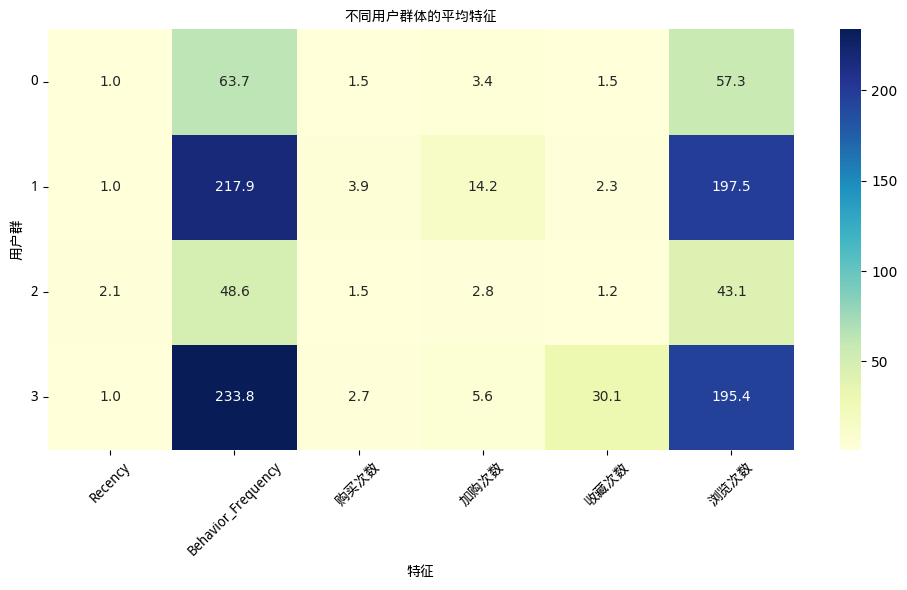

In [147]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".1f",
                 vmin=cluster_summary.min().min(), vmax=cluster_summary.max().max())

plt.title("不同用户群体的平均特征", fontproperties=myfont)
plt.xlabel("特征", fontproperties=myfont)
plt.ylabel("用户群", fontproperties=myfont)

ax.set_xticklabels(ax.get_xticklabels(), fontproperties=myfont, rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=myfont, rotation=0)

plt.tight_layout()
plt.savefig('res_figure/不同用户群体的平均特征.png')
plt.show()

簇0：用户活跃且收藏多，但购买转化较低，适合重点培养促成转化。
簇3：用户高活跃高转化，是核心客户，建议重点维护。
簇1、簇2：低活跃用户，尤其簇2为沉睡用户，需通过营销活动唤醒或评估淘汰。
对核心客户（簇3）提供会员权益和个性化服务，提升忠诚度。
对潜在高价值用户（簇0）加强促销引导，提升收藏转化率。
对低活跃用户（簇1和簇2）实施激活策略，如优惠推送、提醒唤醒。